!pip install japanize-matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import japanize_matplotlib
# 日本語フォントの設定
import matplotlib
matplotlib.rcParams['font.family'] = 'UD Digi Kyokasho N-R'

# from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

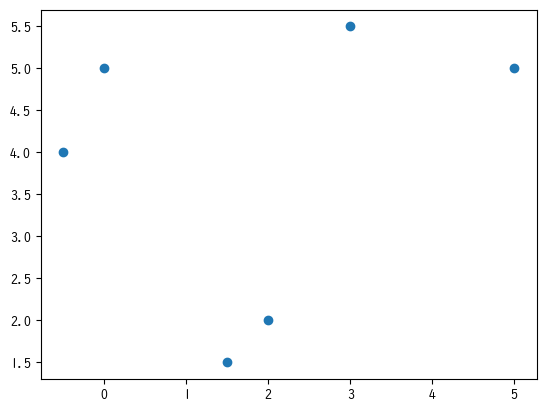

In [4]:
x = [1.5, 2.0, -0.5, 0, 3.0, 5.0]
y = [1.5, 2.0, 4.0, 5, 5.5, 5.0]

df = pd.DataFrame({"x": x, "y": y})

plt.scatter(x, y)

## K平均法

In [5]:
from sklearn.cluster import KMeans


x = [1.5, 2.0, -0.5, 0, 3.0, 5.0]
y = [1.5, 2.0, 4.0, 5, 5.5, 5.0]

df = pd.DataFrame({"x": x, "y": y})

model = KMeans(n_clusters=3)
model.fit(df)

print(model.labels_)

[1 1 2 2 0 0]


## 階層的クラスタリング

In [6]:
from sklearn.cluster import AgglomerativeClustering


x = [1.5, 2.0, -0.5, 0, 3.0, 5.0]
y = [1.5, 2.0, 4.0, 5, 5.5, 5.0]

df = pd.DataFrame({"x": x, "y": y})

model = AgglomerativeClustering(n_clusters=2)
model.fit(df)

print(model.labels_)

[0 0 0 0 1 1]


## DBSCAN

In [7]:
from sklearn.cluster import DBSCAN


x = [1.5, 2.0, -0.5, 0, 3.0, 5.0]
y = [1.5, 2.0, 4.0, 5, 5.5, 5.0]

df = pd.DataFrame({"x": x, "y": y})

# DBSCANの実行
dbscan = DBSCAN(eps=2.0, min_samples=2)
dbscan.fit(df)

# クラスター番号を取得
print(dbscan.labels_)

[ 0  0  1  1 -1 -1]


## PyCaret

!pip install pycaret[full]==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret[full]

In [9]:
import pycaret
pycaret.__version__

'3.3.2'

In [10]:
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data2 = get_data('pokemon')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
from pycaret.clustering import *
s = setup(data, session_id = 123, ignore_features=["species"])

,Description,Value
0,Session id,123
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [13]:
all_metrics = get_metrics()
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x00000201AEC22D30>,"make_scorer(silhouette_score, response_method=...",pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x0000020...,"make_scorer(calinski_harabasz_score, response_...",pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x00000201AE...,"make_scorer(davies_bouldin_score, response_met...",pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x00000201ACAAD...,"make_scorer(homogeneity_score, response_method...",pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x00000201ACA...,"make_scorer(adjusted_rand_score, response_meth...",pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x00000201ACAA...,"make_scorer(completeness_score, response_metho...",pred,{},True,True,False


In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [15]:
kmeans = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


In [16]:
assign_model(kmeans)

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Cluster 0
146,6.3,2.5,5.0,1.9,Cluster 2
147,6.5,3.0,5.2,2.0,Cluster 2
148,6.2,3.4,5.4,2.3,Cluster 0


In [17]:
plot_model(kmeans, plot='cluster')

In [18]:
plot_model(kmeans, plot='tsne')

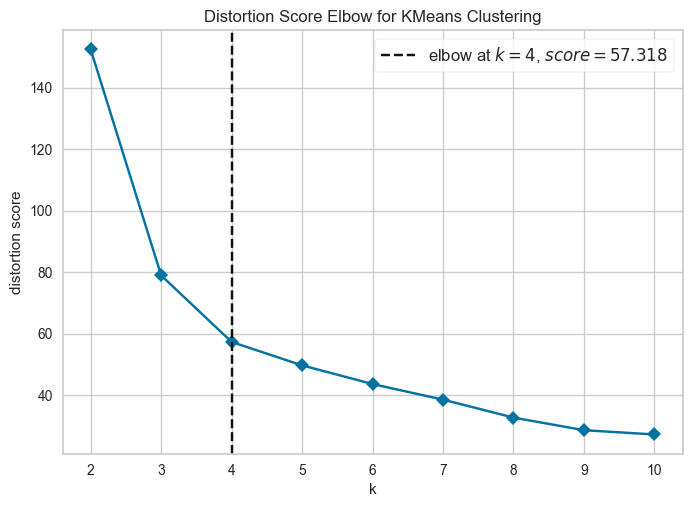

In [19]:
plot_model(kmeans, plot='elbow')

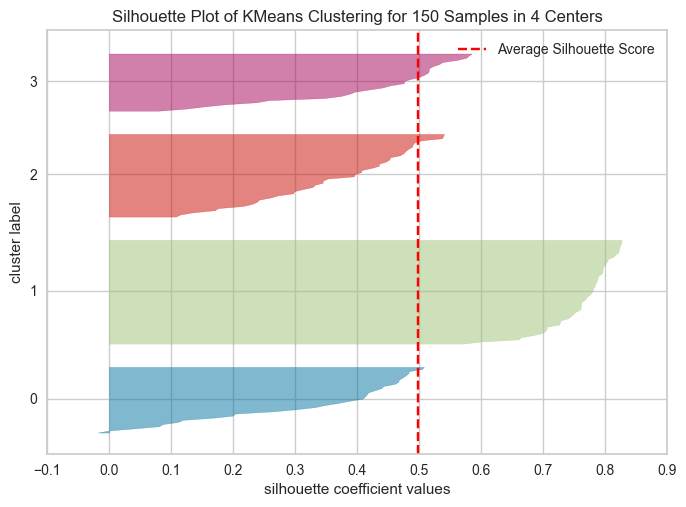

In [20]:
plot_model(kmeans, plot='silhouette')

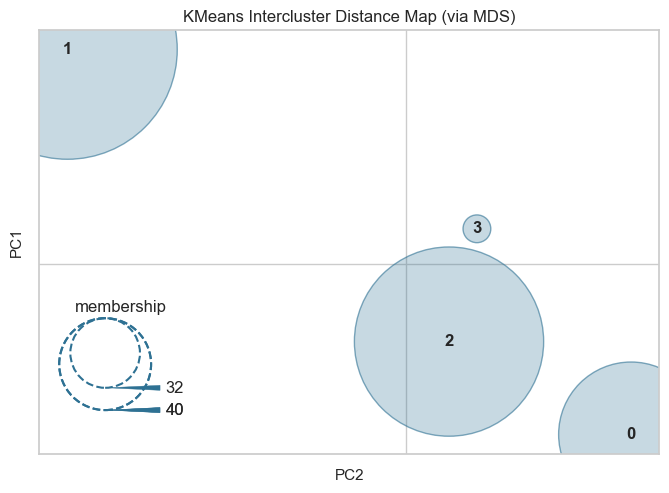

In [21]:
plot_model(kmeans, plot='distance')

In [22]:
plot_model(kmeans, plot='distribution')

In [23]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…